# [#36](https://github.com/blaylockbk/Herbie/issues/36) Adding access to ECMWF fields

In [1]:
from herbie.archive import Herbie
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt
import pandas as pd

import requests
import json

from toolbox.cartopy_tools import common_features, pc

In [2]:
H = Herbie('2022-01-26', model='ecmwf')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:279: UserWarning: `product` not specified. Will use ["oper"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2022-Jan-26 00:00 UTC F00 [ECMWF] [product=oper] GRIB2 file from azure and index file from azure.                                                                                                                                                       


In [3]:
H

[ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F00

In [4]:
H.grib

'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-0h-oper-fc.grib2'

In [5]:
H.idx

'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-0h-oper-fc.index'

In [7]:
H.download(":t:")

📇 Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F00                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-0h-oper-fc.grib2
   1: GRIB_message=10  :t:250:pl:g:0001:od:fc:oper
   2: GRIB_message=12  :t:500:pl:g:0001:od:fc:oper
   3: GRIB_message=15  :t:925:pl:g:0001:od:fc:oper
   4: GRIB_message=16  :t:50:pl:g:0001:od:fc:oper
   5: GRIB_message=25  :t:300:pl:g:0001:od:fc:oper
   6: GRIB_message=27  :t:200:pl:g:0001:od:fc:oper
   7: GRIB_message=28  :t:1000:pl:g:0001:od:fc:oper
   8: GRIB_message=35  :t:850:pl:g:0001:od:fc:oper
   9: GRIB_message=42  :t:700:pl:g:0001:od:fc:oper


In [8]:
H.xarray(':t:')

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 9, latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
  * isobaricInhPa        (isobaricInhPa) float64 1e+03 925.0 ... 200.0 50.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] ...
Data variables:
    t                    (isobaricInhPa, latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

In [9]:
_.gribfile_projection

<xarray.DataArray 'gribfile_projection' ()>
array(None, dtype=object)
Coordinates:
    time        datetime64[ns] 2022-01-26
    step        timedelta64[ns] 00:00:00
    valid_time  datetime64[ns] 2022-01-26
Attributes:
    crs_wkt:                      GEOGCRS["unknown",DATUM["unknown",ELLIPSOID...
    semi_major_axis:              6371229.0
    semi_minor_axis:              6371229.0
    inverse_flattening:           0.0
    reference_ellipsoid_name:     unknown
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          unknown
    grid_mapping_name:            latitude_longitude
    long_name:                    ECMWF model grid projection

In [9]:
df.index += 1
df

,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,domain,expver,class,type,stream,search_this
1,0,609046,0-609046,2022-01-26,2022-01-26,0 days,gh,925,pl,g,0001,od,fc,oper,:gh:925:pl:g:0001:od:fc:oper
2,609046,1218092,609046-1218092,2022-01-26,2022-01-26,0 days,st,NaN,sfc,g,0001,od,fc,oper,:st:sfc:g:0001:od:fc:oper
3,1218092,1218312,1218092-1218312,2022-01-26,2022-01-26,0 days,tp,NaN,sfc,g,0001,od,fc,oper,:tp:sfc:g:0001:od:fc:oper
4,1218312,1827358,1218312-1827358,2022-01-26,2022-01-26,0 days,skt,NaN,sfc,g,0001,od,fc,oper,:skt:sfc:g:0001:od:fc:oper
5,1827358,2233454,1827358-2233454,2022-01-26,2022-01-26,0 days,r,250,pl,g,0001,od,fc,oper,:r:250:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,47302466,48114462,47302466-48114462,2022-01-26,2022-01-26,0 days,vo,200,pl,g,0001,od,fc,oper,:vo:200:pl:g:0001:od:fc:oper
79,48114462,48926458,48114462-48926458,2022-01-26,2022-01-26,0 days,vo,250,pl,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
80,48926458,48926678,48926458-48926678,2022-01-26,2022-01-26,0 days,ro,NaN,sfc,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper
81,48926678,49738674,48926678-49738674,2022-01-26,2022-01-26,0 days,d,50,pl,g,0001,od,fc,oper,:d:50:pl:g:0001:od:fc:oper


In [16]:
grib_source = H.grib
outFile = H.get_localFilePath(searchString=":10u:")

for i, (grbmsg, row) in enumerate(H.idx_df.iterrows()):
    if i == 0:
        curl = f"curl -s --range {row.range} {grib_source} > {outFile}"
        print(curl)

        print(f"{i=}")
        print(f"{grbmsg=}")
        print(f"{row.search_this}")
        #print(f"{}")

        print(f"{i+1:>4g}: GRIB_message={grbmsg:<3g} \033[34m{':'.join(row.values[5:]).rstrip(':')}\033[m")


curl -s --range 20911322-21520368 https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-0h-oper-fc.grib2 > /p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-oper-fc.grib2.subset_5b384ce32d8cdef02bc3a139d4cac0a22bb029e8
i=0
grbmsg=38
:10u:sfc:g:0001:od:fc:oper


TypeError: sequence item 0: expected str instance, Timedelta found

In [23]:
H.get_localFilePath(':t:')

PosixPath('/p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-oper-fc.grib2.subset_1003983d81b7ef613aaf7ba90ccd7528dbd6db48')

In [11]:
H.xarray(":10u:")

📇 Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F00                                                            
 cURL from file:///p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-oper-fc.grib2


TypeError: sequence item 0: expected str instance, Timedelta found

In [12]:
from herbie.archive import _searchString_help

In [14]:
print(_searchString_help('grib_ls'))


Use regular expression to search for lines in the index file.
Here are some examples you can use for the ecCodes-style `searchString`

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
searchString (oper/enso) Messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence
":gh:"                   geopotential height (all levels)
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"                    Specific Humidity
":r:"                    relative humidity
":ro:"                   Runn-off
":skt:"                  skin temperature
":sp:

In [8]:
ds = cfgrib.open_datasets(
    "/p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-oper-fc.grib2",
    backend_kwargs=dict(indexpath="")
)

In [9]:
len(ds)

7

In [10]:
ds[0]

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    depthBelowLandLayer  float64 0.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] ...
Data variables:
    st                   (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

Text(0.5, 1.0, 'Soil Temperature')

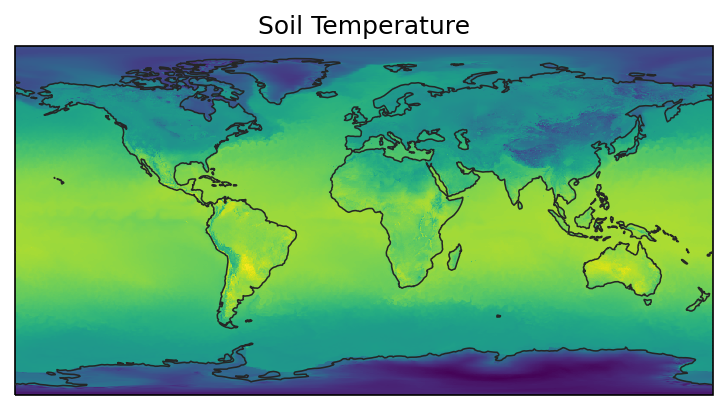

In [11]:
n = 0
ax = common_features(dpi=150).ax
ax.pcolormesh(ds[n].longitude, ds[n].latitude, ds[n].st)
ax.set_title(ds[n].st.attrs['GRIB_name'])

## Create Index DataFrame from grib_ls output

In [12]:
H2 = Herbie('2022-01-26', model='hrrr')
H2.read_idx()

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:217: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2022-Jan-26 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       


,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
1.0,0,238396,0-238396,2022-01-26,2022-01-26,REFC,entire atmosphere,anl
2.0,238396,368348,238396-368348,2022-01-26,2022-01-26,RETOP,cloud top,anl
3.0,368348,719885,368348-719885,2022-01-26,2022-01-26,var discipline=0 center=7 local_table=1 parmca...,entire atmosphere,anl
4.0,719885,940313,719885-940313,2022-01-26,2022-01-26,VIL,entire atmosphere,anl
5.0,940313,2375450,940313-2375450,2022-01-26,2022-01-26,VIS,surface,anl
...,...,...,...,...,...,...,...,...
166.0,123681683,123705144,123681683-123705144,2022-01-26,2022-01-26,ICEC,surface,anl
167.0,123705144,125260741,123705144-125260741,2022-01-26,2022-01-26,SBT123,top of atmosphere,anl
168.0,125260741,127645008,125260741-127645008,2022-01-26,2022-01-26,SBT124,top of atmosphere,anl


In [14]:
H.idx

'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-0h-oper-fc.index'

In [34]:
# grib_ls keywords explained here:
# https://confluence.ecmwf.int/display/UDOC/Identification+keywords

r = requests.get(H.idx)
idxs = [
    json.loads(x) for x in r.text.split("\n") if x
]
df = pd.DataFrame(idxs)
df['start_byte'] = df['_offset']
df['end_byte'] = df['_offset'] + df['_length']
df['range'] = df.start_byte.astype(str) + "-" + df.end_byte.astype(str)
df['reference_time'] = pd.to_datetime(df.date+df.time, format="%Y%m%d%H%M")
df['step'] = pd.to_timedelta(df.step.astype(int), unit='H')
df['valid_time'] = df.reference_time + df.step

df = df.reindex(
    columns = [
        'start_byte',
        'end_byte',
        'range',
        'reference_time',
        'valid_time',
        'step',
        # --- Used for searchString ------------------------------------
        'param', # parameter field (variable)
        'levelist', # level
        'levtype', # sfc=surface, pl=pressure level, pt=potential vorticity
        # --------------------------------------------------------------
        'domain', # g=global
        'expver', # experiment version
        'class',  # classification (od=routing operations, rd=research, )
        'type',   # fc=forecast, an=analysis, 
        'stream', # oper=operationa, wave=wave, ef/enfo=ensemble, 
    ]
)

df['search_this'] = df.loc[:,'param':].astype(str).apply(
        lambda x: ":" + ":".join(x).rstrip(":").replace(':nan:', ":"), axis=1
    )

# df.attrs = dict(
#     url=self.idx,
#     source=self.idx_source,
#     description="Inventory index for the GRIB2 file.",
#     model=self.model,
#     product=self.product,
#     lead_time=self.fxx,
#     datetime=self.date,
# )

df

,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,domain,expver,class,type,stream,search_this
0,0,609046,0-609046,2022-01-26,2022-01-26,0 days,gh,925,pl,g,0001,od,fc,oper,:gh:925:pl:g:0001:od:fc:oper
1,609046,1218092,609046-1218092,2022-01-26,2022-01-26,0 days,st,NaN,sfc,g,0001,od,fc,oper,:st:sfc:g:0001:od:fc:oper
2,1218092,1218312,1218092-1218312,2022-01-26,2022-01-26,0 days,tp,NaN,sfc,g,0001,od,fc,oper,:tp:sfc:g:0001:od:fc:oper
3,1218312,1827358,1218312-1827358,2022-01-26,2022-01-26,0 days,skt,NaN,sfc,g,0001,od,fc,oper,:skt:sfc:g:0001:od:fc:oper
4,1827358,2233454,1827358-2233454,2022-01-26,2022-01-26,0 days,r,250,pl,g,0001,od,fc,oper,:r:250:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,47302466,48114462,47302466-48114462,2022-01-26,2022-01-26,0 days,vo,200,pl,g,0001,od,fc,oper,:vo:200:pl:g:0001:od:fc:oper
78,48114462,48926458,48114462-48926458,2022-01-26,2022-01-26,0 days,vo,250,pl,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
79,48926458,48926678,48926458-48926678,2022-01-26,2022-01-26,0 days,ro,NaN,sfc,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper
80,48926678,49738674,48926678-49738674,2022-01-26,2022-01-26,0 days,d,50,pl,g,0001,od,fc,oper,:d:50:pl:g:0001:od:fc:oper


In [20]:
df.param.unique()

array(['gh', 'st', 'tp', 'skt', 'r', 'u', 'v', 'sp', 't', 'msl', '10v',
       'tcwv', '10u', '2t', 'q', 'd', 'vo', 'ro'], dtype=object)

In [35]:
#searchString=':10(u|v):'
searchString=":(t|u|v|r):"

# Filter DataFrame by searchString
logic = df.search_this.str.contains(searchString)
if logic.sum() == 0:
    print(
        f"No GRIB messages found. There might be something wrong with {searchString=}"
    )
    #print(_searchString_help(searchString))

df.loc[logic]


/p/work1/tmp/blaylock/ipykernel_78650/3427476624.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,domain,expver,class,type,stream,search_this
4,1827358,2233454,1827358-2233454,2022-01-26,2022-01-26,0 days,r,250,pl,g,0001,od,fc,oper,:r:250:pl:g:0001:od:fc:oper
5,2233454,2842500,2233454-2842500,2022-01-26,2022-01-26,0 days,u,50,pl,g,0001,od,fc,oper,:u:50:pl:g:0001:od:fc:oper
6,2842500,3451546,2842500-3451546,2022-01-26,2022-01-26,0 days,v,50,pl,g,0001,od,fc,oper,:v:50:pl:g:0001:od:fc:oper
8,4060592,4466688,4060592-4466688,2022-01-26,2022-01-26,0 days,r,1000,pl,g,0001,od,fc,oper,:r:1000:pl:g:0001:od:fc:oper
9,4466688,5075734,4466688-5075734,2022-01-26,2022-01-26,0 days,t,250,pl,g,0001,od,fc,oper,:t:250:pl:g:0001:od:fc:oper
10,5075734,5481830,5075734-5481830,2022-01-26,2022-01-26,0 days,r,200,pl,g,0001,od,fc,oper,:r:200:pl:g:0001:od:fc:oper
11,5481830,6090876,5481830-6090876,2022-01-26,2022-01-26,0 days,t,500,pl,g,0001,od,fc,oper,:t:500:pl:g:0001:od:fc:oper
14,7308968,7918014,7308968-7918014,2022-01-26,2022-01-26,0 days,t,925,pl,g,0001,od,fc,oper,:t:925:pl:g:0001:od:fc:oper
15,7918014,8527060,7918014-8527060,2022-01-26,2022-01-26,0 days,t,50,pl,g,0001,od,fc,oper,:t:50:pl:g:0001:od:fc:oper
16,8527060,8933156,8527060-8933156,2022-01-26,2022-01-26,0 days,r,300,pl,g,0001,od,fc,oper,:r:300:pl:g:0001:od:fc:oper


In [92]:
"""
searchString examples for grib_ls style index files

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
searchString (oper/enso) Messages that will be downloaded 
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector      
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence         
":gh:"                   geopotential height (all levels)        
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"                    Specific Humidity         
":r:"                    relative humidity
":ro:"                   Runn-off          
":skt:"                  skin temperature
":sp:"                   surface pressure
":t:"                    temperature
":tcwv:"                 Total column vertically integrated water vapor
":vo:"                   Relative vorticity
":v:"                    v wind vector   
":u:"                    u wind vector
":(t|u|v|r):"            Temp, u/v wind, RH (all levels)

======================== ==============================================
searchString (wave/waef) Messages that will be downloaded 
======================== ==============================================
":swh:"                  Significant height of wind waves + swell
":mwp:"                  Mean wave period
":mwd:"                  Mean wave direction
":pp1d:"                 Peak wave period
":mp2:"                  Mean zero-crossing wave period

"""  

df.param.unique()

array(['gh', 'st', 'tp', 'skt', 'r', 'u', 'v', 'sp', 't', 'msl', '10v',
       'tcwv', '10u', '2t', 'q', 'd', 'vo', 'ro'], dtype=object)

In [52]:
H2.read_idx()

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
1.0,0,238396,0-238396,2022-01-26,2022-01-26,REFC,entire atmosphere,anl
2.0,238396,368348,238396-368348,2022-01-26,2022-01-26,RETOP,cloud top,anl
3.0,368348,719885,368348-719885,2022-01-26,2022-01-26,var discipline=0 center=7 local_table=1 parmca...,entire atmosphere,anl
4.0,719885,940313,719885-940313,2022-01-26,2022-01-26,VIL,entire atmosphere,anl
5.0,940313,2375450,940313-2375450,2022-01-26,2022-01-26,VIS,surface,anl
...,...,...,...,...,...,...,...,...
166.0,123681683,123705144,123681683-123705144,2022-01-26,2022-01-26,ICEC,surface,anl
167.0,123705144,125260741,123705144-125260741,2022-01-26,2022-01-26,SBT123,top of atmosphere,anl
168.0,125260741,127645008,125260741-127645008,2022-01-26,2022-01-26,SBT124,top of atmosphere,anl


In [33]:
H = Herbie('2022-01-26', model='ecmwf', product='oper')

🏋🏻‍♂️ Found 2022-Jan-26 00:00 UTC F00 [ECMWF] [product=oper] GRIB2 file from local and index file from azure.                                                                                                                                                       


In [31]:
r = requests.get(H.idx)
idxs = [
    json.loads(x) for x in r.text.split("\n") if x
]
df = pd.DataFrame(idxs)
df

,domain,date,time,expver,class,type,stream,step,levtype,number,param,_offset,_length
0,g,20220126,0000,0001,od,pf,waef,0,sfc,38,swh,0,501693
1,g,20220126,0000,0001,od,pf,waef,0,sfc,46,swh,501693,501371
2,g,20220126,0000,0001,od,pf,waef,0,sfc,43,swh,1003064,501693
3,g,20220126,0000,0001,od,pf,waef,0,sfc,40,swh,1504757,501339
4,g,20220126,0000,0001,od,cf,waef,0,sfc,NaN,swh,2006096,501339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,g,20220126,0000,0001,od,pf,waef,0,sfc,7,pp1d,125340988,501361
251,g,20220126,0000,0001,od,pf,waef,0,sfc,29,pp1d,125842349,501089
252,g,20220126,0000,0001,od,pf,waef,0,sfc,34,pp1d,126343438,501089
253,g,20220126,0000,0001,od,cf,waef,0,sfc,NaN,pp1d,126844527,501381


In [32]:
df.param.unique(), len(df.param.unique())

(array(['swh', 'mwp', 'mwd', 'mp2', 'pp1d'], dtype=object), 5)

In [36]:
msg = """
searchString examples for grib_ls style index files

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
searchString (oper/enso) Messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence
":gh:"                   geopotential height (all levels)
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"                    Specific Humidity
":r:"                    relative humidity
":ro:"                   Runn-off
":skt:"                  skin temperature
":sp:"                   surface pressure
":t:"                    temperature
":tcwv:"                 Total column vertically integrated water vapor
":vo:"                   Relative vorticity
":v:"                    v wind vector
":u:"                    u wind vector
":(t|u|v|r):"            Temp, u/v wind, RH (all levels)

======================== ==============================================
searchString (wave/waef) Messages that will be downloaded
======================== ==============================================
":swh:"                  Significant height of wind waves + swell
":mwp:"                  Mean wave period
":mwd:"                  Mean wave direction
":pp1d:"                 Peak wave period
":mp2:"                  Mean zero-crossing wave period
"""

In [38]:
print(msg)


searchString examples for grib_ls style index files

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
searchString (oper/enso) Messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence
":gh:"                   geopotential height (all levels)
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"                    Specific Humidity
":r:"                    relative humidity
":ro:"                   Runn-off
":skt:"                  skin temperature
":sp:"                   surface pressure
":t:"                    temperature
":tcwv:"

In [12]:
df = H.read_idx()
df

,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,domain,expver,class,type,stream,search_this
grib_message,,,,,,,,,,,,,,,
1,0,609046,0-609046,2022-01-26,2022-01-26,0 days,gh,925,pl,g,0001,od,fc,oper,:gh:925:pl:g:0001:od:fc:oper
2,609046,1218092,609046-1218092,2022-01-26,2022-01-26,0 days,st,NaN,sfc,g,0001,od,fc,oper,:st:sfc:g:0001:od:fc:oper
3,1218092,1218312,1218092-1218312,2022-01-26,2022-01-26,0 days,tp,NaN,sfc,g,0001,od,fc,oper,:tp:sfc:g:0001:od:fc:oper
4,1218312,1827358,1218312-1827358,2022-01-26,2022-01-26,0 days,skt,NaN,sfc,g,0001,od,fc,oper,:skt:sfc:g:0001:od:fc:oper
5,1827358,2233454,1827358-2233454,2022-01-26,2022-01-26,0 days,r,250,pl,g,0001,od,fc,oper,:r:250:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,47302466,48114462,47302466-48114462,2022-01-26,2022-01-26,0 days,vo,200,pl,g,0001,od,fc,oper,:vo:200:pl:g:0001:od:fc:oper
79,48114462,48926458,48114462-48926458,2022-01-26,2022-01-26,0 days,vo,250,pl,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
80,48926458,48926678,48926458-48926678,2022-01-26,2022-01-26,0 days,ro,NaN,sfc,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper


In [16]:
df.reindex(columns=['start_byte', 'hi'])

,start_byte,hi
grib_message,,
1,0,NaN
2,609046,NaN
3,1218092,NaN
4,1218312,NaN
5,1827358,NaN
...,...,...
78,47302466,NaN
79,48114462,NaN
80,48926458,NaN
